In [ ]:
# Jupyter notebook
import pandas as pd
import os
path_Data = 'D:\\Learn\\Python\\Assignment2\\Data\\BigMartSales Prediction\\'
checkPath = os.path.isdir(path_Data)
checkFileTrain = os.path.isfile(path_Data + "Train.csv")
checkFileTest = os.path.isfile(path_Data + "Test.csv")
print("The path and file are valid or not :",
      checkPath, checkFileTrain, checkFileTest)
train = pd.read_csv(path_Data + "Train.csv")
test = pd.read_csv(path_Data + "Test.csv")


The path and file are valid or not : True True True


In [16]:
train.Item_Weight = train.Item_Weight.fillna(train.Item_Weight.mean())
train.Outlet_Size = train.Outlet_Size.fillna(train.Outlet_Size.mode().iloc[0])
train.Item_Fat_Content = train.Item_Fat_Content.fillna(
    train.Item_Fat_Content.mode().iloc[0])
train.Item_Fat_Content = train.Item_Fat_Content.str.replace(
    'low fat', 'Low Fat')
train.Item_Fat_Content = train.Item_Fat_Content.str.replace('LF', 'Low Fat')
train.Item_Fat_Content = train.Item_Fat_Content.str.replace('reg', 'Regular')


In [20]:
x_train = train[["Item_Weight", "Item_Visibility", "Item_MRP"]]
y_train = train["Item_Outlet_Sales"]


In [21]:
train.isna().sum()


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [22]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(x_train, y_train)


KNeighborsRegressor()

In [23]:
y_pred = neigh.predict(x_train)
PredictDF = train.copy()
PredictDF["Item_Outlet_Sales_Predict"] = y_pred


Mean Squared Error (MSE) trên dữ liệu test: 1593725.880440116


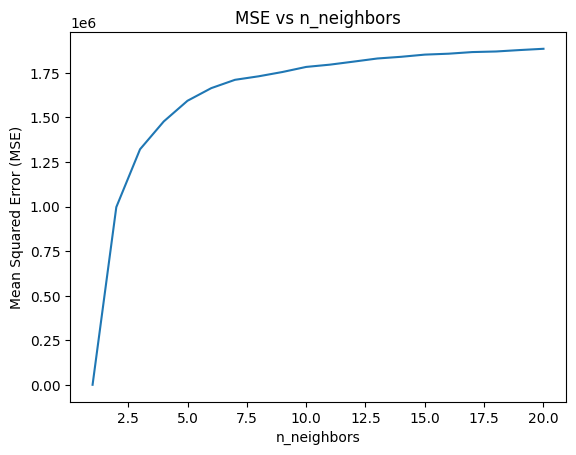

Giá trị tốt nhất cho n_neighbors là: 1


In [24]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Tính toán MSE (Mean Squared Error)
mse = mean_squared_error(y_train, y_pred)
print(f"Mean Squared Error (MSE) trên dữ liệu test: {mse}")

# Tìm giá trị tốt nhất cho n_neighbors (thử từ 1 đến 21 và tìm MSE nhỏ nhất)
mse_values = []
for n in range(1, 21):  # Thử n_neighbors từ 1 đến 21
    knn = KNeighborsRegressor(n_neighbors=n)
    knn.fit(x_train, y_train)
    y_pred_predict = knn.predict(x_train)
    mse_values.append(mean_squared_error(y_train, y_pred_predict))

# Vẽ biểu đồ MSE theo n_neighbors
plt.plot(range(1, 21), mse_values)
plt.xlabel('n_neighbors')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs n_neighbors')
plt.show()

# In ra giá trị n_neighbors có MSE thấp nhất
best_n_neighbors_found = mse_values.index(min(mse_values)) + 1
print(f"Giá trị tốt nhất cho n_neighbors là: {best_n_neighbors_found}")
